**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Osvaldo Trejo Noriega
*   MATRÍCULA: A01796850

In [120]:
# from google.colab import drive
# drive.mount('/content/drive')

In [121]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
# os.chdir(DIR)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [125]:
missing_values = df.isnull().sum()
total_values = len(df)
percentage_missing = (missing_values / total_values ) * 100
print(f'missing values per column')
print(percentage_missing)

#global percentage missing values
total_missing = missing_values.sum()
total_percentage_global = (total_missing / total_values) * 100
print(f'Global missing values: {total_percentage_global}')

missing values per column
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64
Global missing values: 12.310856020379976


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [126]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [127]:
print('Median of the values')
df.median(numeric_only=True)

Median of the values


person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64

In [128]:
print('simmetry')
asim = df.skew(numeric_only=True)
print(asim)

simmetry
person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64


In [129]:
print('Kurtois')
curt = df.kurtosis(numeric_only=True)
print(curt)

Kurtois
person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


In [130]:
print('Clasificacion de variables ade simetria para person_age y loan_in_rate')
print(f'Possitive Skewness: {df['person_age'].skew()}')
print(f'Low positive skewness: {df['loan_int_rate'].skew()}')

Clasificacion de variables ade simetria para person_age y loan_in_rate
Possitive Skewness: 2.5813925261849846
Low positive skewness: 0.2085503016908977


In [131]:
print('Clasificacion de variables de curtois para person_age y loan_int_rate')
print(f'variable person_age is Leptocurtica {df['person_age'].kurtosis()}')
print(f'variable laon_int_rate is Platycurtica  {df['loan_int_rate'].kurtosis()}')

Clasificacion de variables de curtois para person_age y loan_int_rate
variable person_age is Leptocurtica 18.560824765312866
variable laon_int_rate is Platycurtica  -0.6716091079813706


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

<Axes: xlabel='loan_int_rate', ylabel='Count'>

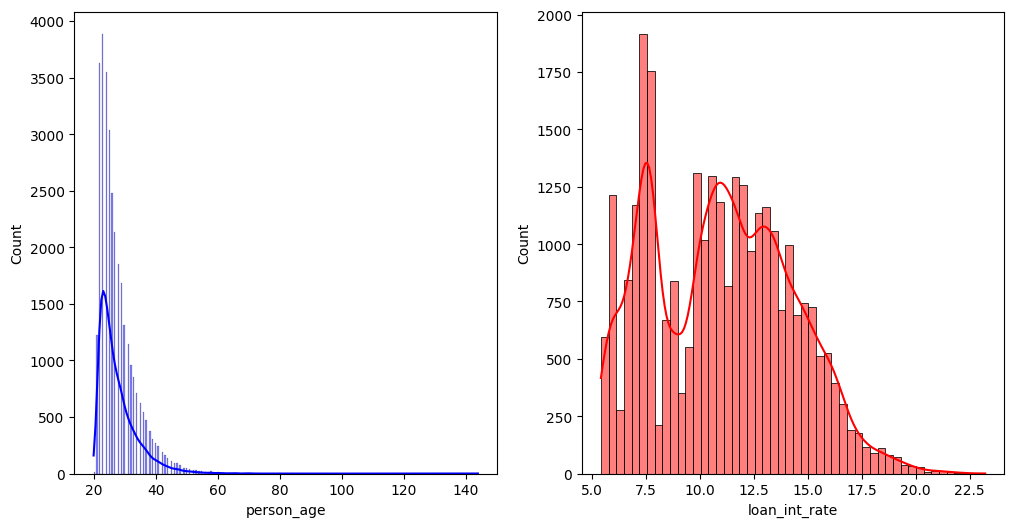

In [132]:
fig, (axe1, axe2) = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(df['person_age'], kde=True, ax=axe1, color='blue')
sns.histplot(df['loan_int_rate'], kde=True, ax=axe2, color='red')

¿Se corresponde con lo obtenido en el cálculo de asimetría? Si corresponde, ya que como vemos en los histogramas de lado izquierdo con la variable persone_age donde en el valor de asimetria es de 18.56 y esta positivamente asimetrico a la derecha y en en el histograma del lado derecho podemos ver que esta un poco segado a la derecha pero casi pegado a lo asimetrico  

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

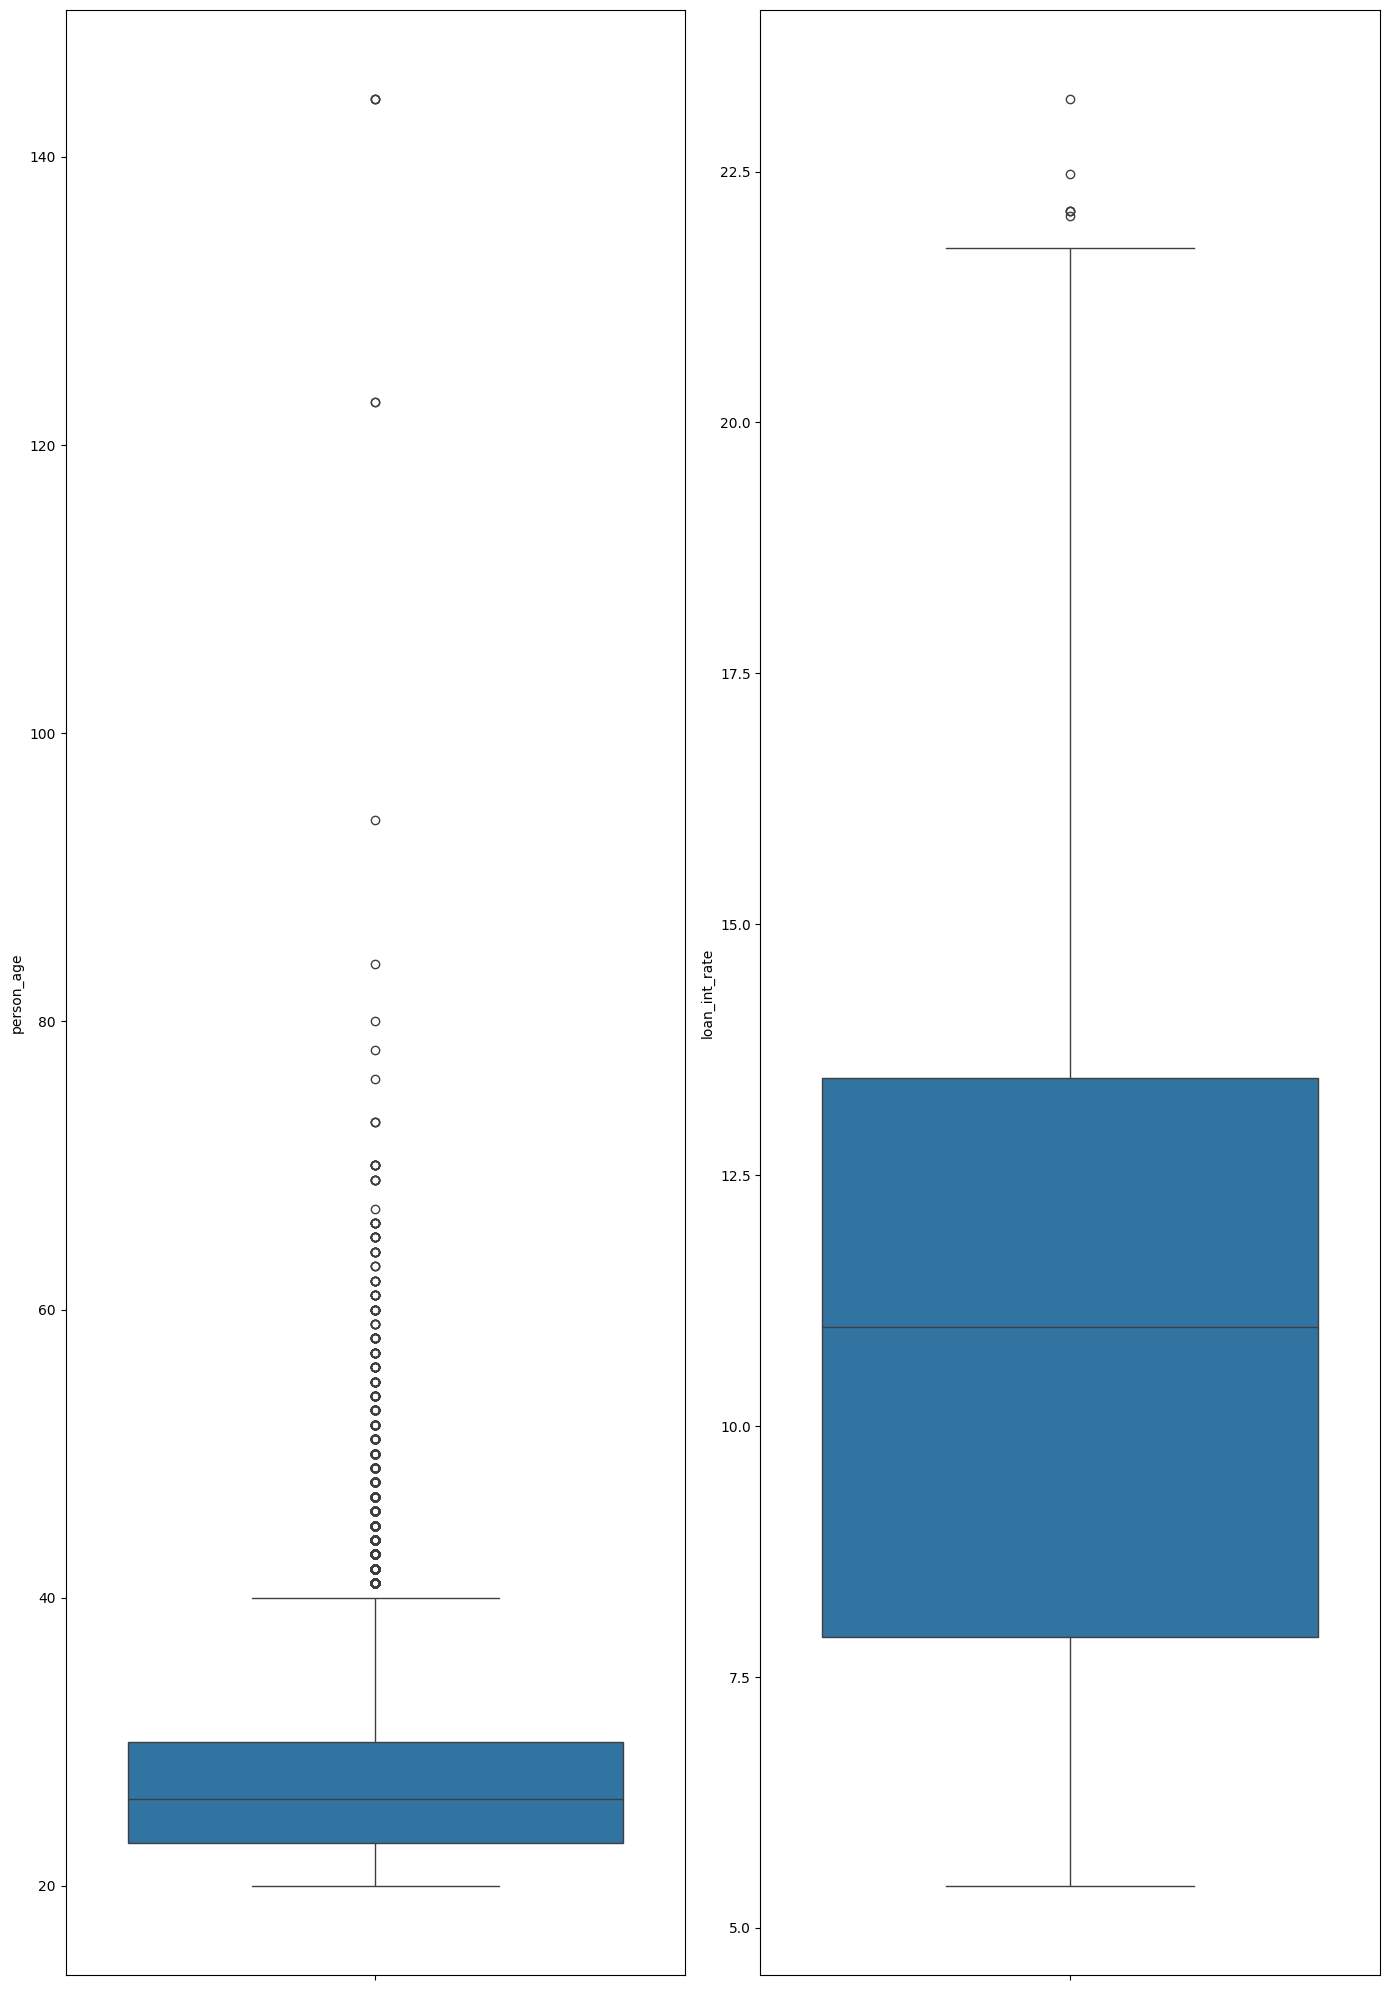

In [133]:
fig, (axe1, axe2) = plt.subplots(1, 2, figsize=(14, 20))

sns.boxplot(df['person_age'], ax=axe1)
sns.boxplot(df['loan_int_rate'], ax=axe2)
plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [134]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers['person_age']

81       144
183      144
575      123
747      123
29121     50
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: person_age, Length: 1494, dtype: int64

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [135]:
df[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']].mode()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,A,N


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

Grafica de barras para person_home_ownership


<Axes: xlabel='person_home_ownership', ylabel='count'>

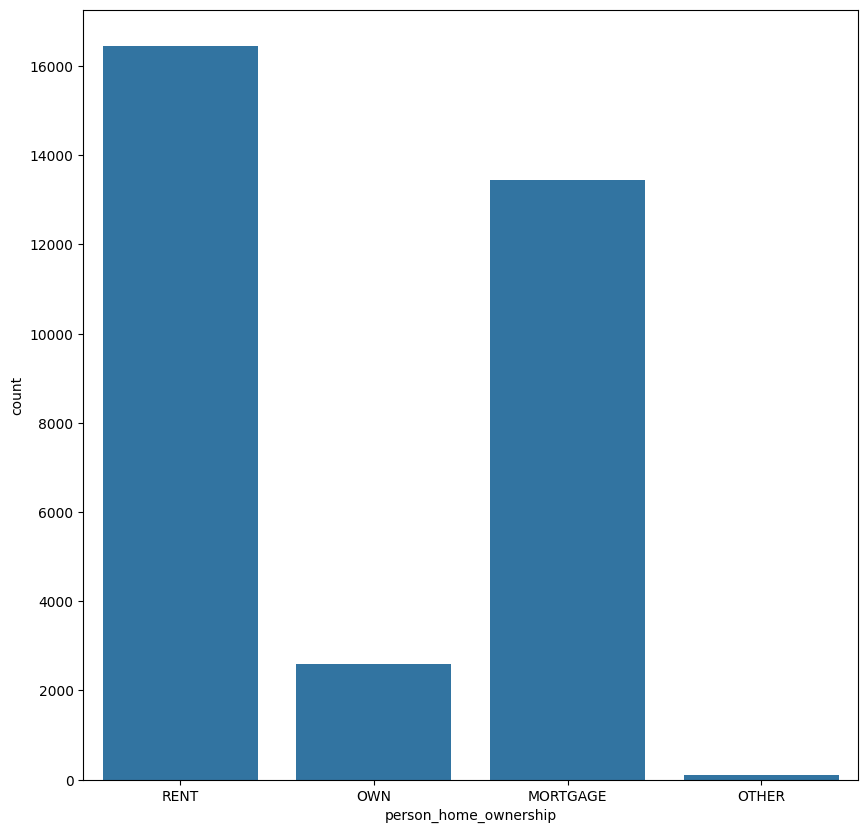

In [136]:
print('Grafica de barras para person_home_ownership')

plt.figure(figsize=(10, 10))
sns.countplot(x='person_home_ownership', data=df)


Grafica de barras para loan_intent


<Axes: xlabel='loan_intent', ylabel='count'>

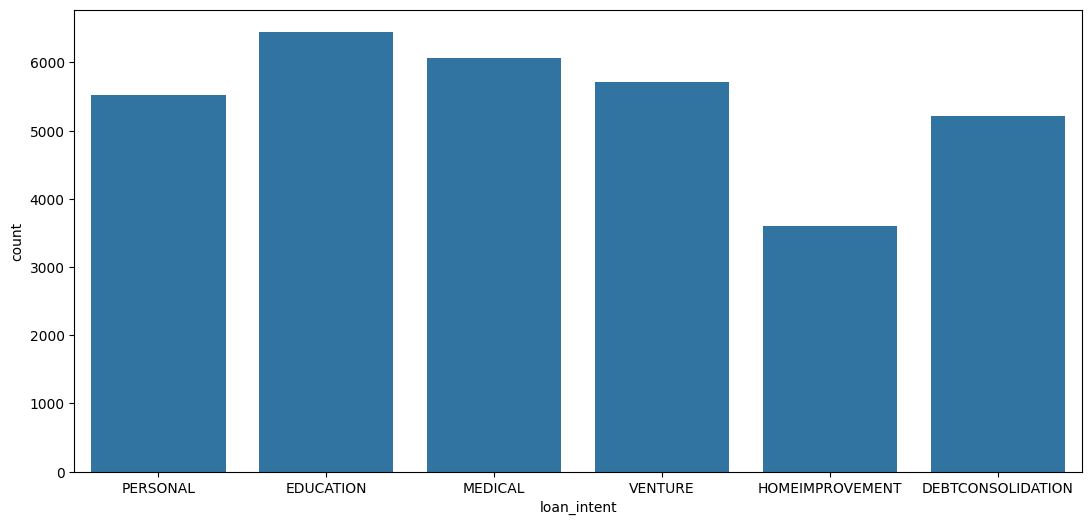

In [137]:
print('Grafica de barras para loan_intent')
plt.figure(figsize=(13, 6))
sns.countplot(x='loan_intent', data=df)

Grafica de barras para loan_grade


<Axes: xlabel='loan_grade', ylabel='count'>

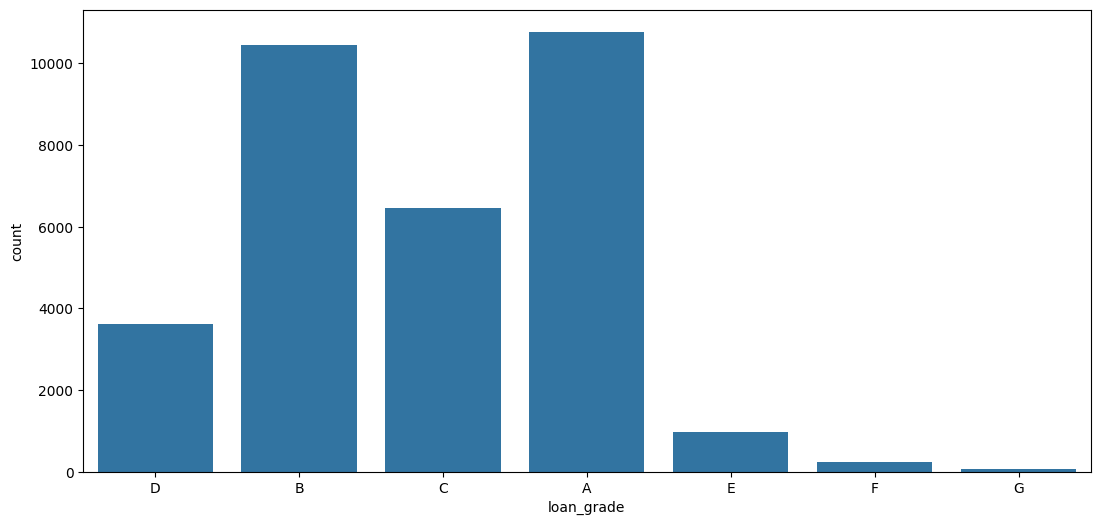

In [138]:
print('Grafica de barras para loan_grade')

plt.figure(figsize=(13, 6))
sns.countplot(x='loan_grade', data=df)

Grafica de barras para cb_person_default_on_file


<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

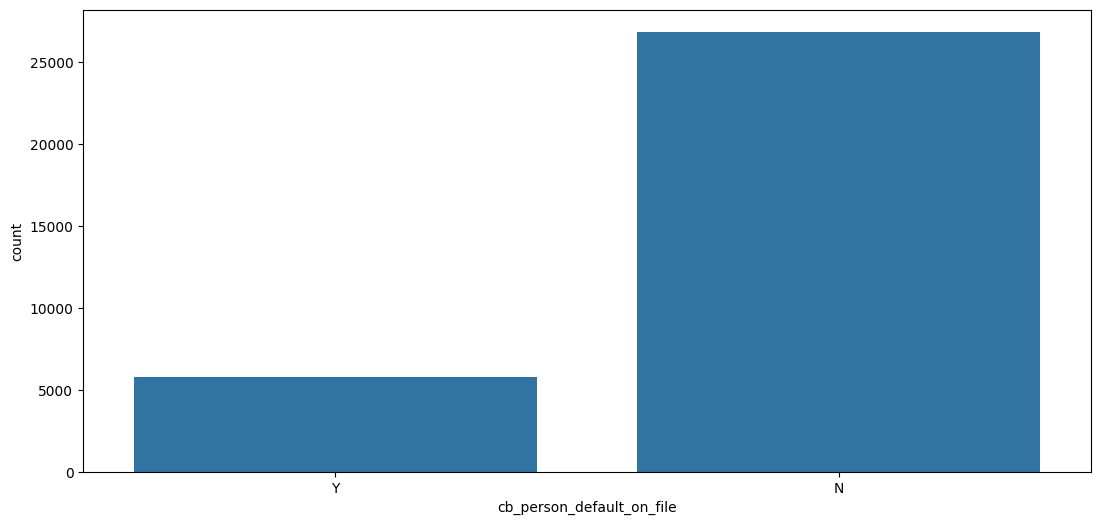

In [139]:
print('Grafica de barras para cb_person_default_on_file')

plt.figure(figsize=(13, 6))
sns.countplot(x='cb_person_default_on_file', data=df)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

    * Mediana:  La mediana es la línea vertical en el cajón. Un valor más alto para una category significa que la mitad de los clientes de esa category tienen un loan_percent_income más alto.
    * Rango intercuartil (IQR):  La longitud del cajón representa el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3). Un IQR más grande indica mayor variabilidad en los datos.
    * Outliers:  Los puntos que están por debajo del "mustache" (puntos extremos) son outliers. La presencia de outliers sugiere que hay valores atípicos en la distribución.
    * Distribuciones:  Si una category tiene un cajón más apretado, significa que los loan_percent_income son más consistentes y estables.
     

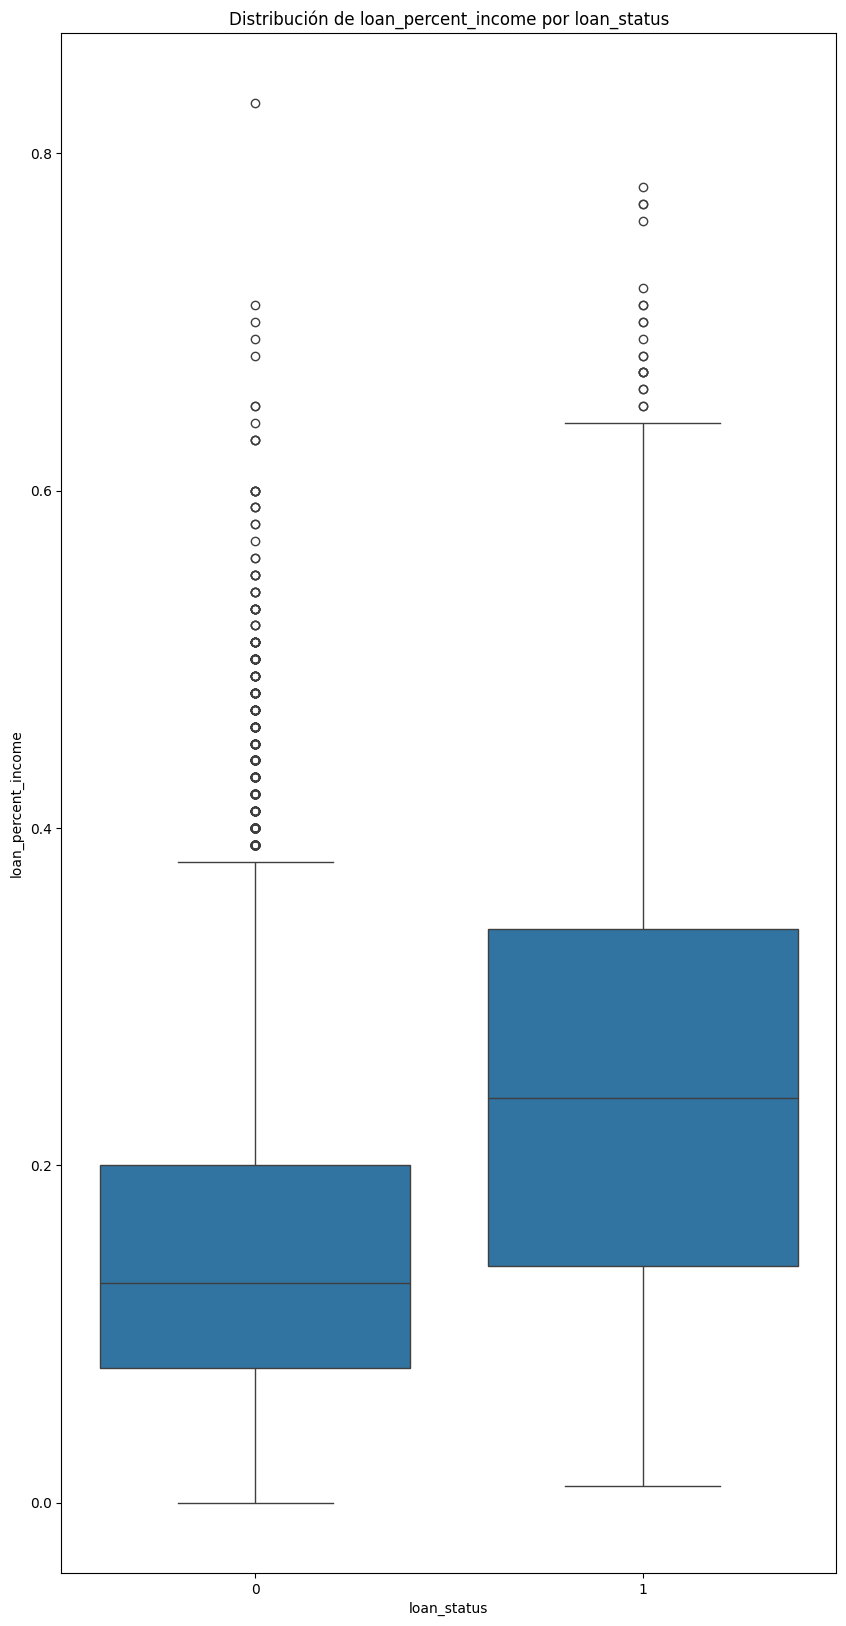

In [140]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribución de loan_percent_income por loan_status')
plt.xlabel('loan_status')
plt.ylabel('loan_percent_income')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

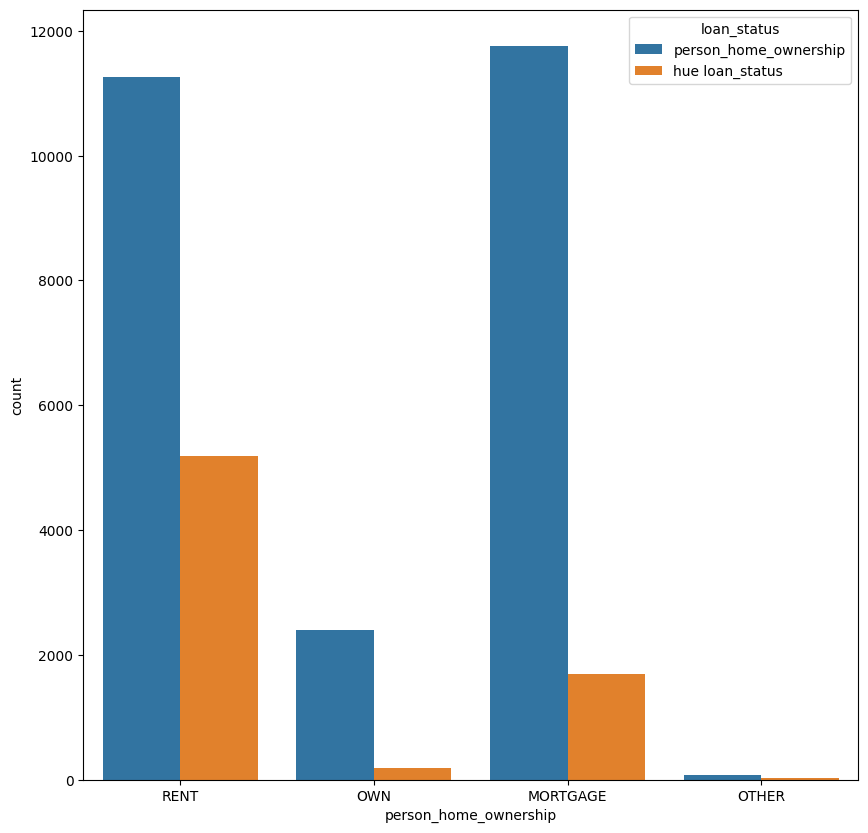

In [141]:
plt.figure(figsize=(10, 10))
sns.countplot(x='person_home_ownership', data=df, hue='loan_status')
plt.gcf().axes[0].get_legend().texts[0].set_text('person_home_ownership')
plt.gcf().axes[0].get_legend().texts[1].set_text('hue loan_status')

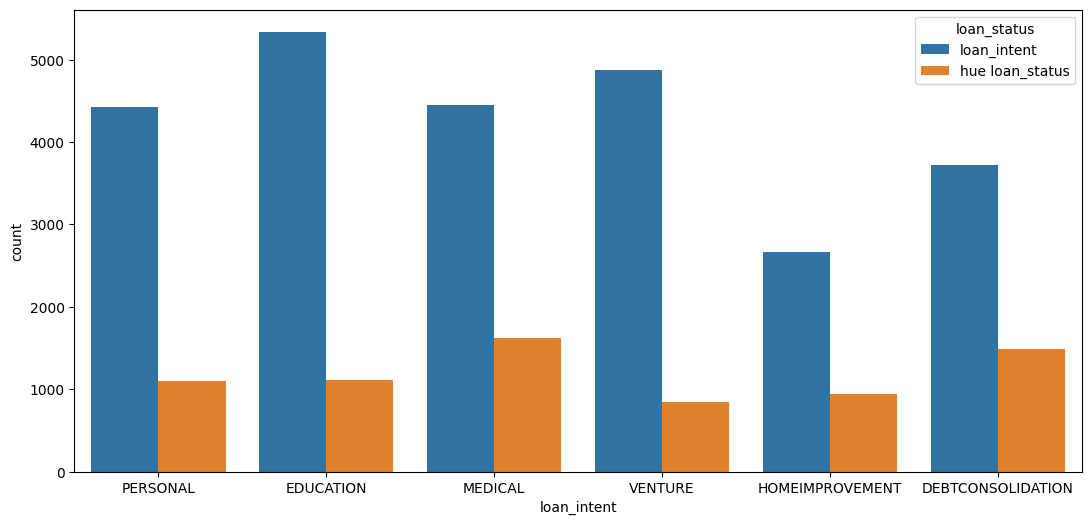

In [142]:
plt.figure(figsize=(13, 6))
sns.countplot(x='loan_intent', data=df, hue='loan_status')
plt.gcf().axes[0].get_legend().texts[0].set_text('loan_intent')
plt.gcf().axes[0].get_legend().texts[1].set_text('hue loan_status')

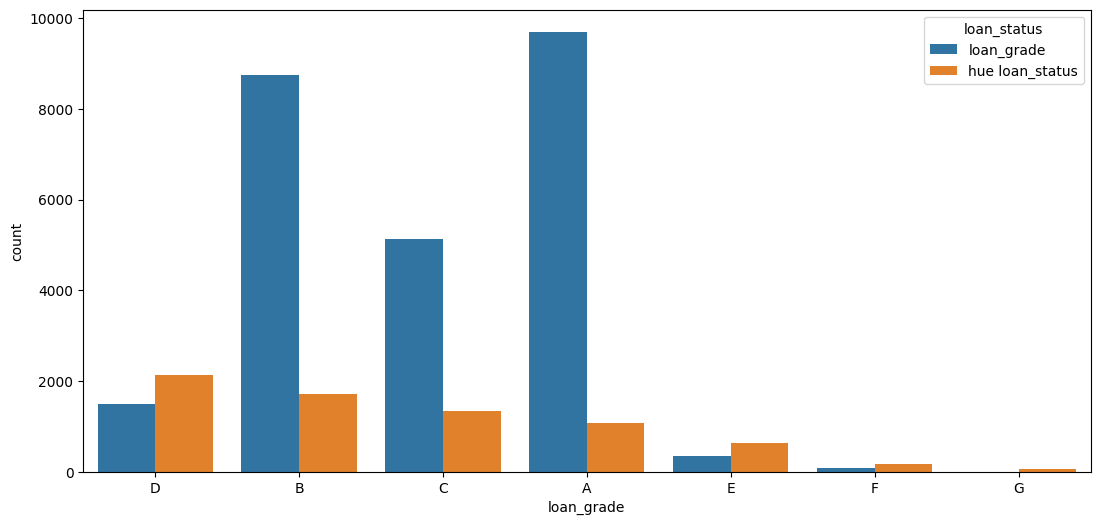

In [143]:
plt.figure(figsize=(13, 6))
sns.countplot(x='loan_grade', data=df, hue='loan_status')
plt.gcf().axes[0].get_legend().texts[0].set_text('loan_grade')
plt.gcf().axes[0].get_legend().texts[1].set_text('hue loan_status')

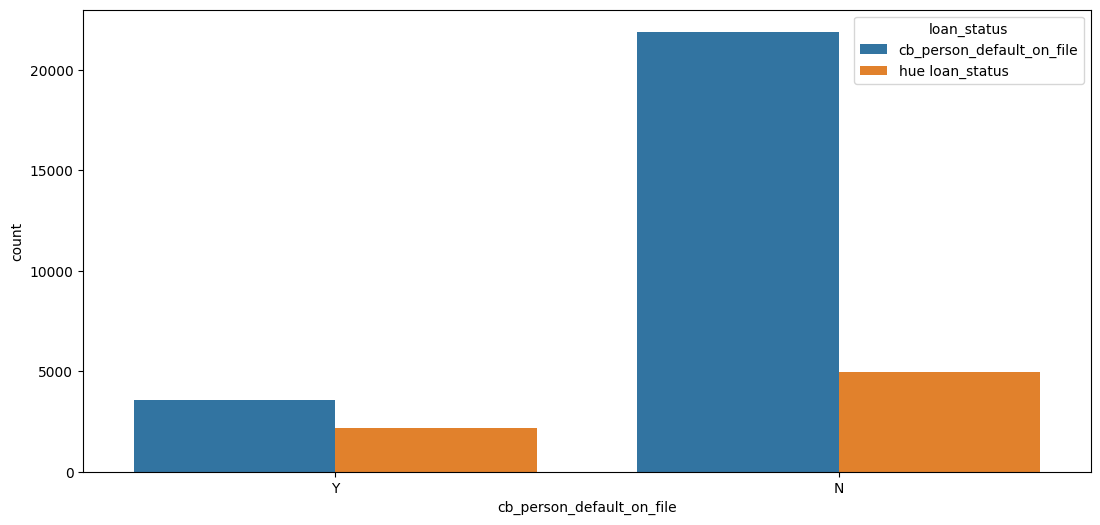

In [144]:
plt.figure(figsize=(13, 6))
sns.countplot(x='cb_person_default_on_file', data=df, hue='loan_status', legend=True)
plt.gcf().axes[0].get_legend().texts[0].set_text('cb_person_default_on_file')
plt.gcf().axes[0].get_legend().texts[1].set_text('hue loan_status')

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?
Yo creo que las variables con mas correlacion positiva es loan_int_rate​ 

<Axes: >

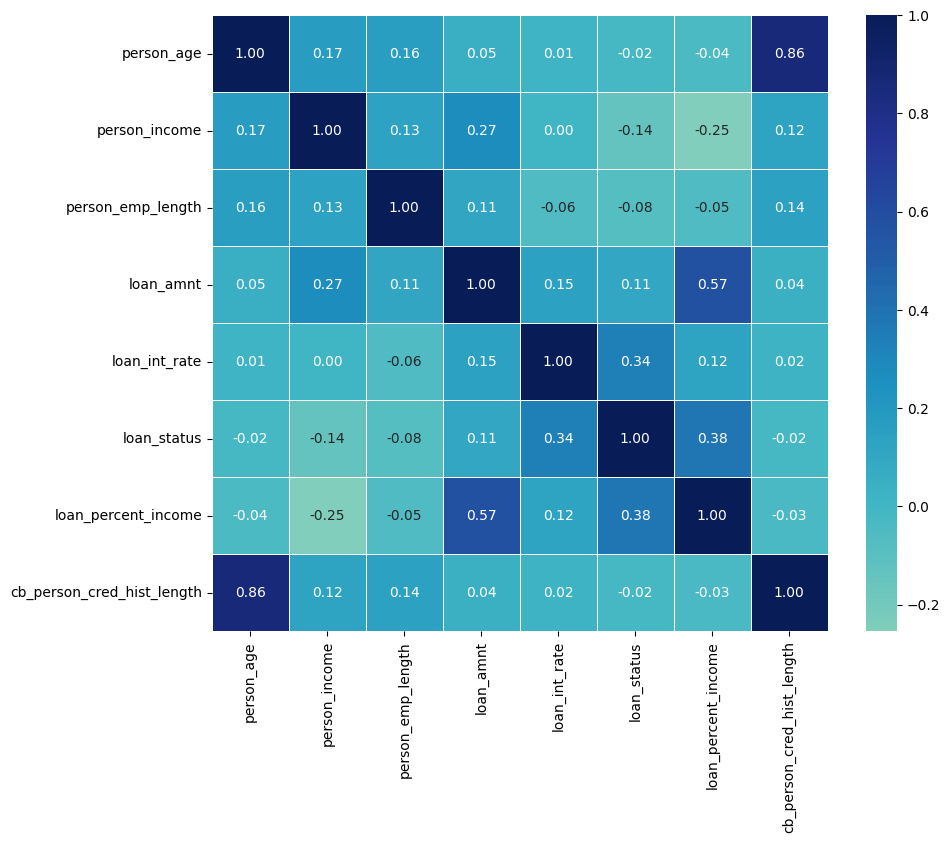

In [145]:
plt.figure(figsize=(10, 8)) 

correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlGnBu',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5
)